In [17]:
%pip install celluloid
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate
import pandas as pd


Note: you may need to restart the kernel to use updated packages.


In [18]:
def GetFourier(t,T,N,f):
    
   # y = t.copy()
    
    a0, error0 = integrate.quad( lambda t: f(t), -0.5*T , 0.5*T )
    a0 *= 2./T
    
    y = a0
    
    fig = plt.figure(figsize=(6,6))
    camera = Camera(fig)
    for n in range(1,N):
        an, erroran = integrate.quad( lambda t: f(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        bn, errorbn = integrate.quad( lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        y += 2.*an*np.cos( (2*np.pi*n*t)/T )/T + 2.*bn*np.sin( (2*np.pi*n*t)/T )/T 
        plt.plot(t,y)
        camera.snap()
    animation = camera.animate()
    animation.save('DiegoHernandezEmersonHernandez.mp4')
    return y


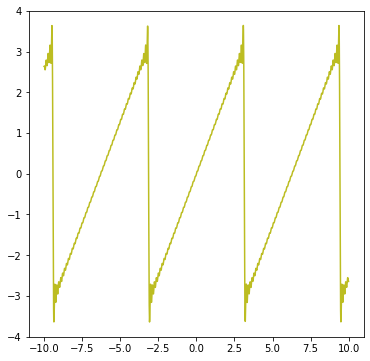

In [19]:
def f(t):
    return t
t = np.arange(-10,10,0.01)
y = GetFourier(t,2*np.pi,50,f)
 

C:\Users\PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


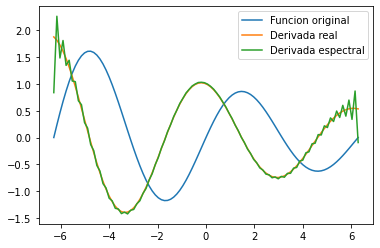

In [20]:
x=np.linspace(-2*np.pi,2*np.pi,100)

fx= lambda x: np.exp(-0.1*x)*np.sin(x)
df= lambda x: np.exp(-0.1*x)*np.sin(x)*(-0.1)+np.exp(-0.1*x)*np.cos(x)

fxi=fx(x)
dfi=df(x)

y=fx(x)
c=np.fft.fft(y)
freq=np.fft.fftfreq(100,d=0.02)
ct=complex(0,1)*c*freq
cf=np.fft.ifft(ct)
plt.figure()
plt.plot(x,fxi, label="Funcion original")
plt.plot(x,dfi, label="Derivada real")
plt.plot(x,cf, label="Derivada espectral")

plt.legend()

In [21]:
def f(t):
    return ((1/12)*t*(t**2-(np.pi)**2))**2

A= -np.pi
B= np.pi
def wGauss(i):
    y,w= np.polynomial.legendre.leggauss(i)
    xi= (B+A)/2 + (B-A)/2 * y
    wi= (B-A)/2 * w
    return xi,wi

def integra(N): #N usado en la cuadratura
    suma= 0
    xi,wi= wGauss(N)
    for i in range(len(xi)):
        suma+= wi[i]* f(xi[i])
    return suma
        
Z_6_num = integra(1000)/np.pi  #De acuerdo a la formula dada por Parseval
Z_6_teo= (np.pi**6)/945
print(Z_6_num,Z_6_teo)


1.017343061984548 1.017343061984449


In [22]:
#intento del 1.5
df= pd.read_csv("ManchasSolares.csv", delimiter= ";")
filtering= df["Year"] >= 1900
df= df[filtering]
mean= np.mean(df['Nstain'])
anios= df['Year'].unique()
df['Nstain']= df['Nstain'] - mean
tstep= 1/12
t= np.linspace(0,(len(df)-1)*tstep,len(df['Nstain']))
t+= 1900

Fourier= np.fft.fft(df['Nstain'])
Xmag= np.abs(Fourier)/len(df['Nstain'])
fig = plt.figure(figsize=(15,10))
ax=  fig.add_subplot(2,1,1)
ax1= fig.add_subplot(2,2,3)

ax.plot(t,abs(Fourier))
ax1.plot(t,Fourier)

FileNotFoundError: [Errno 2] No such file or directory: 'ManchasSolares.csv'